In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',')
df

,id,log.Te,log.light
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19
5,6,4.46,5.46
6,7,3.84,4.65
7,8,4.57,5.27
8,9,4.26,5.57
9,10,4.37,5.12


In [3]:
X = df['log.Te'].values
Y = df['log.light'].values
N = len(X)

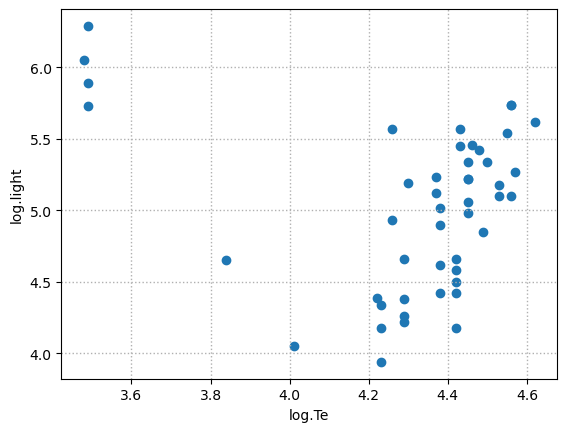

In [4]:
plt.scatter(X, Y)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [5]:
import mltools.estimators as estimators
import mltools.funcs as funcs
import mltools.scores as scores

$$
|x|_\varepsilon = \sqrt{\varepsilon^2 + x^2} - \varepsilon
$$

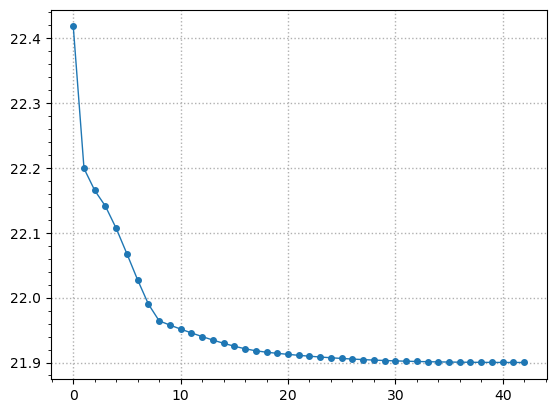

In [6]:
irls = estimators.IRLS(funcs.SoftAbs(0.001))
irls.fit(X[:,None], Y)

plt.plot(irls.qvals, marker='o', markersize=4, linewidth=1.0)
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [7]:
Y_p = irls.model.evaluate(X[:,None])

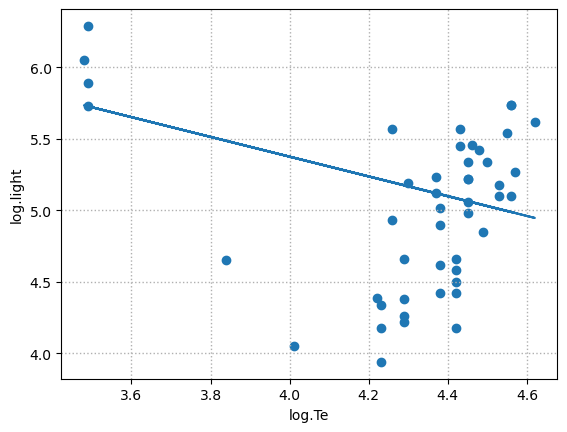

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_p)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [9]:
import mltools.estimators as estimators
import mltools.aggfuncs as aggfuncs
import mltools.funcs as funcs
import mltools.scores as scores

In [28]:
alpha=0.84
rho_func = funcs.SoftQuantileFunc(funcs.SoftAbs(0.001), alpha)
cmean = aggfuncs.CMMean(rho_func)
mirls = estimators.MIRLS(cmean)
mirls.fit(X[:,None], Y)

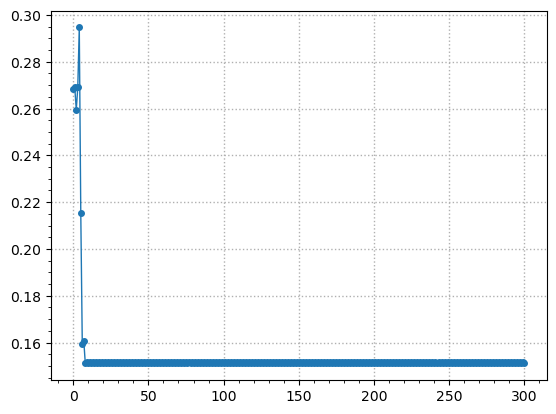

In [29]:
plt.plot(mirls.qvals, marker='o', markersize=4, linewidth=1.0)
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

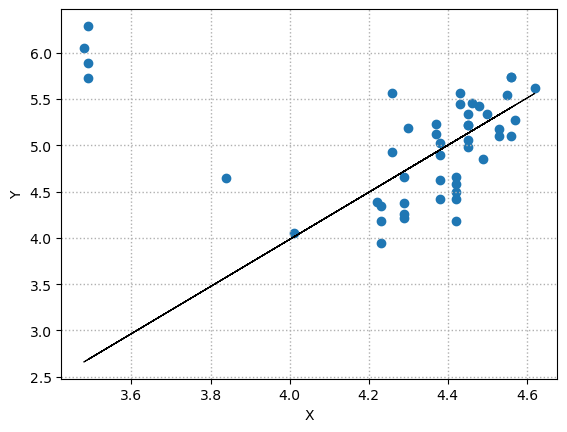

In [39]:
Y_p = mirls.model.evaluate(X[:,None])
plt.scatter(X, Y)
plt.plot(X, Y_p, color='k', linewidth=0.75)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

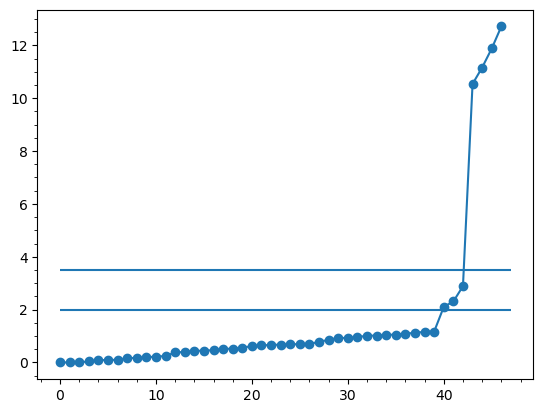

In [84]:
E = abs(Y - Y_p)
Z = abs(scores.modified_zscore(E))

plt.plot(sorted(Z), marker='o')
plt.minorticks_on()
plt.hlines(3.5, 0, N)
plt.hlines(2, 0, N)
plt.show()

In [85]:
X1 = X[Z < 2]
Y1 = Y[Z < 2]

In [86]:
est = estimators.LinearLS()
est.fit(X1[:,None], Y1)

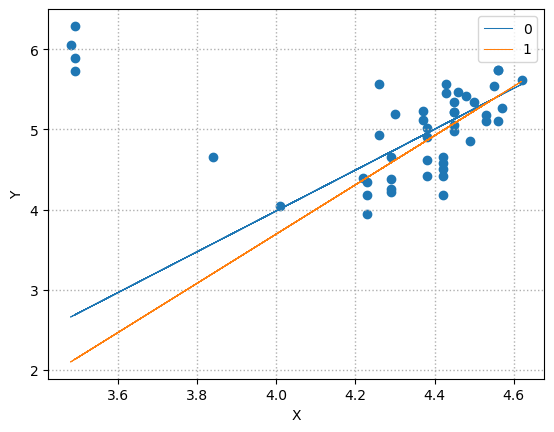

In [88]:
plt.scatter(X, Y)
plt.plot(X, mirls.model.evaluate(X[:,None]), linewidth=0.75, label='0')
plt.plot(X, est.model.evaluate(X[:,None]), linewidth=0.75, label='1')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.legend()
plt.show()

In [89]:
E1 = abs(Y - est.model.evaluate(X[:,None]))
Z1 = abs(scores.modified_zscore(E1))

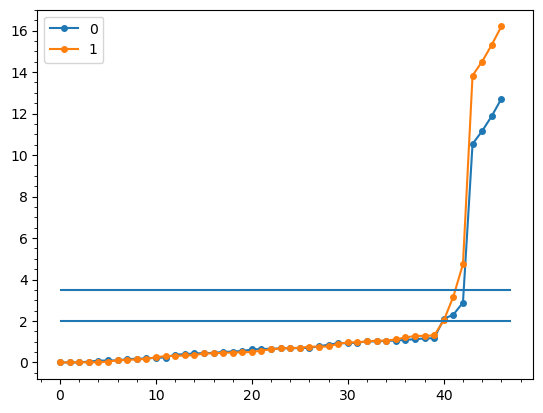

In [91]:
plt.plot(sorted(Z), marker='o', markersize=4, label='0')
plt.plot(sorted(Z1), marker='o', markersize=4, label='1')
plt.minorticks_on()
plt.hlines(3.5, 0, N)
plt.hlines(2, 0, N)
plt.legend()
plt.show()

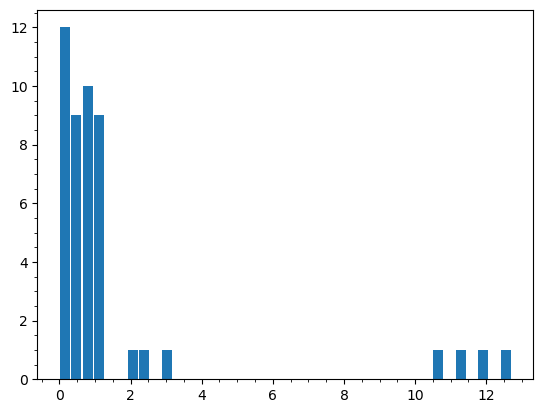

In [100]:
plt.hist(Z, bins=40, rwidth=0.9)
plt.minorticks_on()
plt.show()